In [51]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

In [52]:
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [53]:
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [54]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

In [55]:
import numpy as np
X = np.array((adver_data.TV.values, adver_data.Radio.values, adver_data.Newspaper.values))

In [56]:
Y = np.array(adver_data.Sales.values)

In [7]:
Y.shape = (200, 1)

In [8]:
print(X[0][1])

44.5


In [57]:
means = (0.0,0.0,0.0)
stds = (0.0,0.0,0.0)
means = (X[0].mean(), X[1].mean(), X[2].mean())
stds = (X[0].std(), X[1].std(), X[2].std())
print(type(means[0]))

<class 'numpy.float64'>


In [58]:
X[0] = (X[0] - means[0]) / stds[0]
X[1] = (X[1] - means[1]) / stds[1]
X[2] = (X[2] - means[2]) / stds[2]

In [59]:
O = np.ones(200).T
O.shape = (200,1)

In [60]:
X.shape

(3, 200)

In [61]:
X_n = np.hstack((X.T, O))

In [62]:
L = O.shape[0]

In [10]:
from sklearn.metrics import mean_squared_error

ImportError: No module named 'sklearn'

In [63]:
def mserror(y, y_pred):
    a = (np.sum((y - y_pred)**2))/np.shape(y)[0]
    return(a)

In [40]:
y_pred = [np.median(Y)]*L
answer1 = mserror(Y, y_pred)
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


NameError: name 'write_answer_to_file' is not defined

In [64]:
def normal_equation(X, y):
    w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y)) 
    #return np.linalg.inv(np.matrix(w))
    return w

norm_eq_weights = normal_equation(X_n, Y)
print(norm_eq_weights)

[  3.91925365   2.79206274  -0.02253861  14.0225    ]


In [19]:
answer2 = np.sum(norm_eq_weights[3])
#print(answer2)
i = 0
for i in range(L):
    write_answer_to_file(answer2, '2.txt')

In [17]:
def linear_prediction(X, w):
    return np.dot(X,w)

    

In [65]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    k = 2 / X.shape[0]
    grad0 = k*X[train_ind][0]*(linear_prediction(X[train_ind], w) - y[train_ind])
    grad1 = k*X[train_ind][1]*(linear_prediction(X[train_ind], w) - y[train_ind])
    grad2 = k*X[train_ind][2]*(linear_prediction(X[train_ind], w) - y[train_ind])
    grad3 = k*X[train_ind][3]*(linear_prediction(X[train_ind], w) - y[train_ind])
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [19]:
def stochastic_gradient_step1 (X, y, w, train_ind, eta=0.01):
    
    grad0 = w[0][0]-(2*eta/X.shape[0])*X[train_ind][0]*(linear_prediction(X[train_ind], w)[0]-y[train_ind])
    grad1 = w[1][0]-(2*eta/X.shape[0])*X[train_ind][1]*(linear_prediction(X[train_ind], w)[0]-y[train_ind])
    grad2 = w[2][0]-(2*eta/X.shape[0])*X[train_ind][2]*(linear_prediction(X[train_ind], w)[0]-y[train_ind])
    grad3 = w[3][0]-(2*eta/X.shape[0])*X[train_ind][3]*(linear_prediction(X[train_ind], w)[0]-y[train_ind])
    
    res = np.array([grad0, grad1, grad2, grad3])
    return res

In [76]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=10e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
    
    w = np.zeros([4,1])
    w_temp = norm_eq_weights.reshape(4,1)  
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
    #while iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        # делаем шаг, пишем ошибку
        w_temp = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta)
        y_pred = linear_prediction(X,w)
        errors.append(mserror(y, y_pred))
        #print(w)
        #print(w_temp)
        #weight_dist = np.sum(w-w_temp)
        #print(weight_dist)
        iter_num = iter_num+1
                
        
    #print(w)     
    return w, errors

In [78]:
%time 10**5
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X_n, Y, np.zeros([4,1]), eta=1e-2, 
                                                max_iter=1e5, min_weight_dist=1e-8, seed=42, verbose=False)
print(stoch_grad_desc_weights)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs
[[  3.94909052]
 [  2.76783147]
 [ -0.04537642]
 [ 14.01961682]]


Populating the interactive namespace from numpy and matplotlib


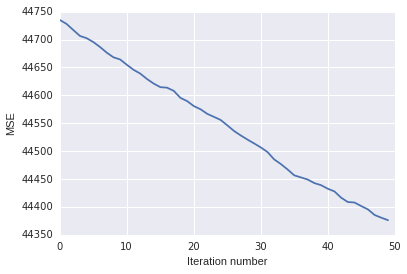

In [68]:
%pylab inline
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sc
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

Populating the interactive namespace from numpy and matplotlib


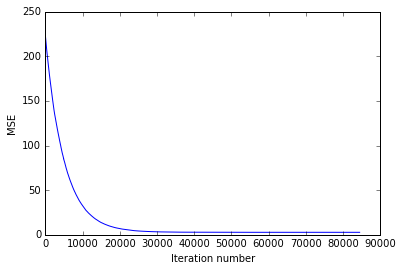

In [119]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [120]:
stoch_grad_desc_weights

array([[  3.91069256e+00],
       [  2.78209808e+00],
       [ -8.10462217e-03],
       [  1.40190566e+01]])

In [121]:
stoch_errors_by_iter[-1]

2.7844125884067035

In [122]:
y_pred = linear_prediction(X_n,stoch_grad_desc_weights)
answer4 = mserror(Y, y_pred)
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.78441258841
